# 0. Project Guidelines

In [ ]:
# 1. Problem statement
# 2. Assumptions/Hypotheses about data and/or modeling
# 3. Data properties (stationarity, correlations, data distribution) and Exploratory data  (did this)
# 4. Data processing (anomaly detection, cleansing and imputations) and transformations
# 5. Feature engineering
# 6. Proposed approaches (model) with justification and trade-offs, if any
# 7. Results (accuracy) and learnings from the methodology
# 8. Future work

# 1. Problem Statement:
- To build a model that more accurately predicts the unit sales for thousands of items sold at top three Corporación Favorita stores. ( After EDA, store number 44, 45, & 47 as top best performing sales)
(a large Ecuadorian-based grocery retailer)
- Forecast the sales data for each outlet from 2017-08-02 to to 2017-08-15 given data from  2013-01-01 to 2017-08-01

We will use Root Mean Squared Error to evaluate

1.1 Data set description

- train.csv
The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
store_nbr identifies the store at which the products are sold.
family identifies the type of product sold.
sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
- test.csv
The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
The dates in the test data are for the 15 days after the last date in the training data.

- stores.csv
Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.
- oil.csv
Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)
- holidays_events.csv
Holidays and Events, with metadata
- NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
- Additional Notes
  - Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
  - A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

# 3. Data properties (stationarity, correlations, data distribution) and Exploratory data analysis

Point to look into:
0. EDA of values (plot)
1. Missing values
2. Stationarity
3. Correlation with oil/ holidays etc.

In [ ]:
# kaggle competitions download -c store-sales-time-series-forecasting
# ^^ put command in shell to download

In [2]:
# Run to mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/My Drive/TS Project May 2024/retail_data')
# os.chdir('/content/drive/MyDrive/Colab_Data')


In [6]:
import pandas as pd
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
store= pd.read_csv('stores.csv')
# holiday= pd.read_csv('holidays_events.csv')
transactions = pd.read_csv('transactions.csv')
oil= pd.read_csv('oil.csv')

In [9]:
pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatible.


## Train Dataset
0. EDA
 - drop id as it is row number only
  - Has 54 stores
  - Has 33 family (types of products)
  - Has 362 unique promotion numbers in onpromotion
  - Date range from  2013-01-01 to 2017-08-15
1. Missing values
  - no missing values
2. Stationarity
  - Number of stores stationary: 33
  - Number of stores non-stationary: 21
3. Correlation with oil prices
  - No strong correlation observed with oil prices


In [10]:
from skimpy import skim

# Checking train dataset
train['date'] = pd.to_datetime(train['date'])
train['family'] = train['family'].astype(str)
train_1 = train.drop(columns=['id']) # drop id as it is just row number
print(train.head())
skim(train)

# No missing values

   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 3000888 │ │ int64       │ 3     │                                                         │
│ │ Number of columns │ 6       │ │ datetime64  │ 1     │                                                         │
│ └───────────────────┴─────────┘ │ string      │ 1     │                                                         │
│                                 │ float64     │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0  ┃ p25     ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id            │   0 │     0 │  1500000 │  866300 │   0 │  750200 │  1500000 │  2251000 │  3001000 │ ▇▇▇▇▇▇ │  │
│ │ store_nbr     │   0 │     0 │     27.5 │   15.59 │   1 │      14 │     27.5 │       41 │       54 │ ▇▇▇▇▇▇ │  │
│ │ sales         │   0 │     0 │    357.8 │    1102 │   0 │       0 │       11 │    195.8 │   124700 │   ▇    │  │
│ │ onpromotion   │   0 │     0 │    2.603 │   12.22 │   0 │       0 │        0 │        0 │      741 │   ▇    │  │
│ └───────────────┴─────┴───────┴──────────┴─────────┴─────┴─────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2013-01-01      │     2017-08-15      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ family                    │       0 │          0 │                          1.7 │                  5001480 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [34]:
# Check no. of stores
no_stores=len(train['store_nbr'].unique())
print(f'Number of stores: {no_stores}')

Number of stores: 54


In [27]:
# Check top 5 performing stores
store_sales_best = train_1.groupby(['store_nbr'])['sales'].sum().reset_index()
store_sales_best = store_sales_best.sort_values(by=['sales'],ascending=False)
store_sales_best.head()
store_sales_best_3= store_sales_best[:3]

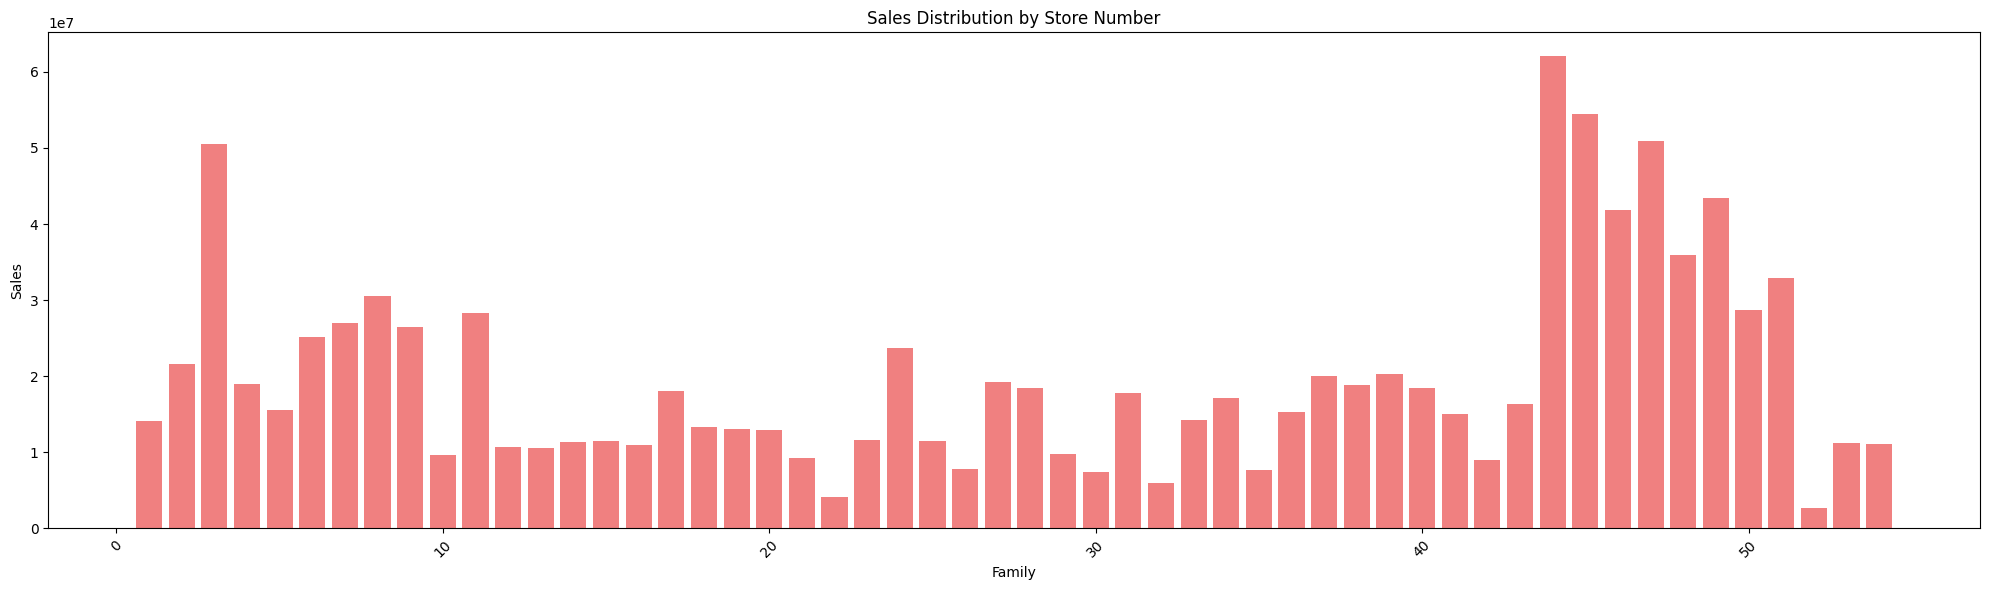

In [23]:
import matplotlib.pyplot as plt
# Plot the histogram by store
plt.figure(figsize=(20, 6))
plt.bar(store_sales_best['store_nbr'], store_sales_best['sales'], color='lightcoral')
plt.xlabel('Family')
plt.ylabel('Sales')
plt.title('Sales Distribution by Store Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

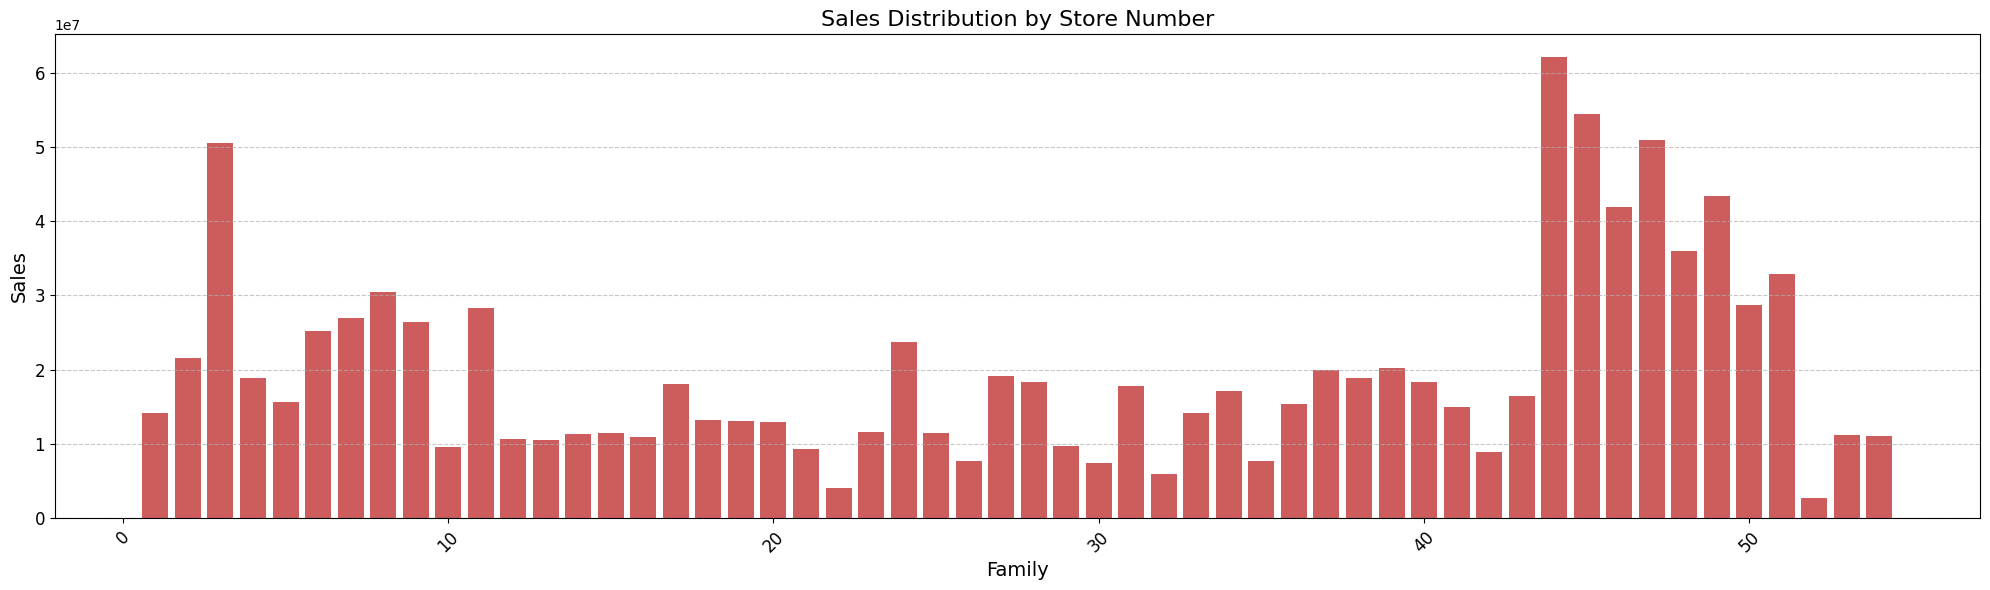

In [30]:
# Plot the histogram by store
plt.figure(figsize=(20, 6))
plt.bar(store_sales_best['store_nbr'], store_sales_best['sales'], color='indianred')

# Increase font sizes for better readability
plt.xlabel('Family', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Sales Distribution by Store Number', fontsize=16)

# Rotate x-ticks and increase font size
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Plot of sales by store

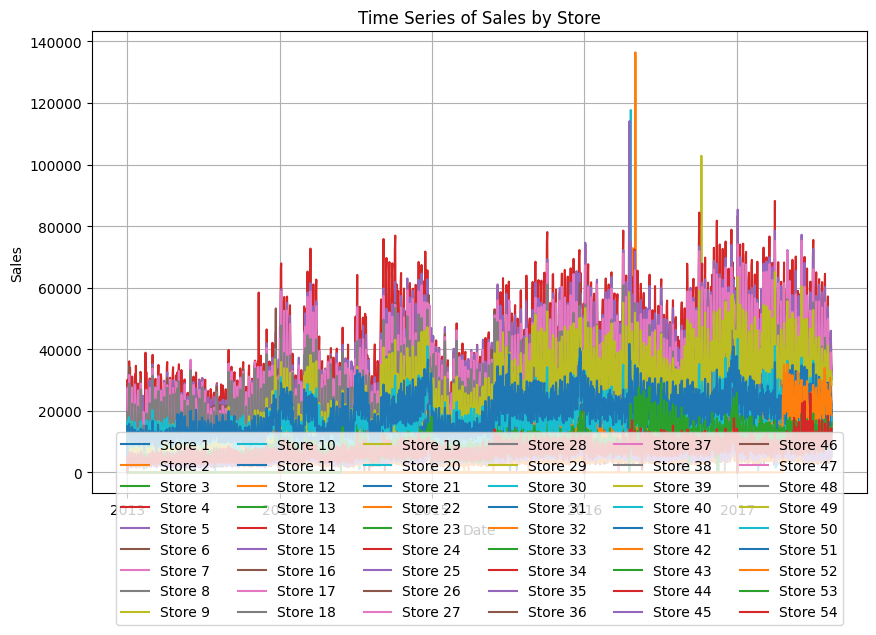

In [40]:
# Plot Performance of stores
import matplotlib.pyplot as plt
# Group data by 'store_nbr', and calculate total sales for each store and date
store_sales = train.groupby(['store_nbr', 'date'])['sales'].sum().reset_index()
# store_sales.head()

# Plot a line for each store
plt.figure(figsize=(10, 6))
for store in store_sales['store_nbr'].unique():
    store_data = store_sales[store_sales['store_nbr'] == store]
    plt.plot(store_data['date'], store_data['sales'], label=f'Store {store}')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series of Sales by Store')
plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol=len(store_sales['store_nbr'].unique())/8)
plt.grid(True)
plt.show()

In [39]:
import pandas as pd
# Check Family unique values:
def find_unique_values(data):
    unique_values = list(set(data))
    print(unique_values)
    print(len(unique_values))

find_unique_values(train['family'])

['DELI', 'PERSONAL CARE', 'LIQUOR,WINE,BEER', 'BREAD/BAKERY', 'MEATS', 'MAGAZINES', 'HARDWARE', 'SEAFOOD', 'AUTOMOTIVE', 'PET SUPPLIES', 'GROCERY I', 'BEVERAGES', 'CELEBRATION', 'CLEANING', 'FROZEN FOODS', 'BEAUTY', 'HOME CARE', 'PLAYERS AND ELECTRONICS', 'HOME AND KITCHEN I', 'DAIRY', 'PRODUCE', 'LINGERIE', 'BABY CARE', 'EGGS', 'GROCERY II', 'HOME AND KITCHEN II', 'HOME APPLIANCES', 'LAWN AND GARDEN', 'LADIESWEAR', 'PREPARED FOODS', 'POULTRY', 'SCHOOL AND OFFICE SUPPLIES', 'BOOKS']
33


In [47]:
# Check top 5 best selling by family
family_sales_best = train_1.groupby(['family'])['sales'].sum().reset_index()
family_sales_best = family_sales_best.sort_values(by=['sales'],ascending=False)
family_sales_best.head()
family_sales_best_10=family_sales_best[:5]

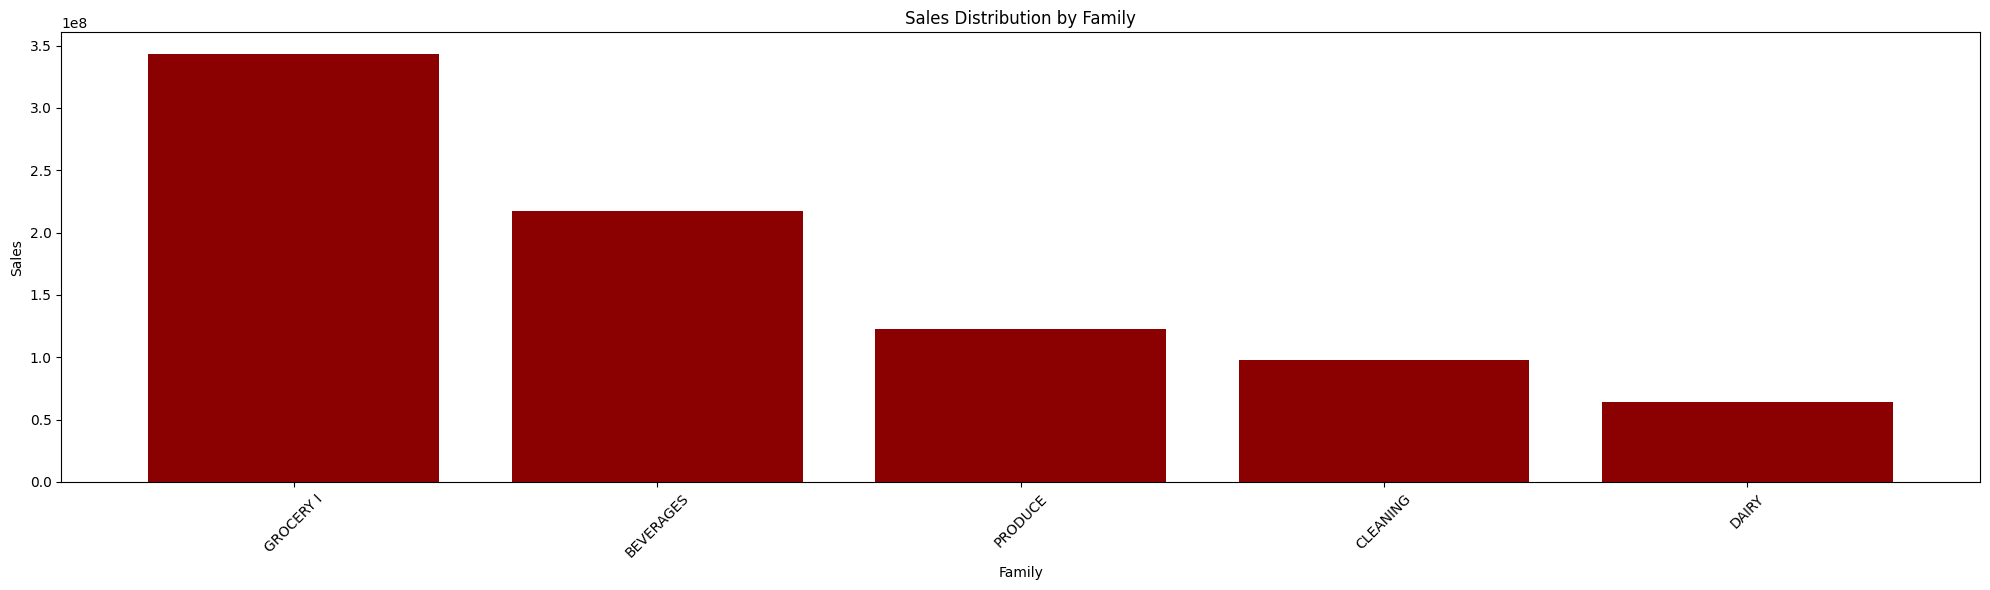

In [48]:
# Plot the histogram by family
plt.figure(figsize=(20, 6))
plt.bar(family_sales_best_10['family'], family_sales_best_10['sales'], color='darkred')
plt.xlabel('Family')
plt.ylabel('Sales')
plt.title('Sales Distribution by Family')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
find_unique_values(train['onpromotion'])
# This many unique values show that it should be similar to promotion id

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

### Test Stationarity

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Create an empty DataFrame to store the results
adf_results_df = pd.DataFrame(columns=['Store', 'ADF Statistic', 'p-value', 'Stationary'])

# Group data by store_nbr
grouped_data = store_sales.groupby('store_nbr')

# Iterate over each store
for store, data in grouped_data:
    # Perform ADF test for stationarity
    result = adfuller(data['sales'])

    # Determine if stationary based on p-value
    stationary = 1 if result[1] < 0.05 else 0

    # Append results to DataFrame
    adf_results_df = pd.concat([adf_results_df, pd.DataFrame({
        'Store': [store],
        'ADF Statistic': [result[0]],
        'p-value': [result[1]],
        'Stationary': [stationary]
    })], ignore_index=True)

# Sort DataFrame by p-value in descending order
adf_results_df = adf_results_df.sort_values(by='p-value', ascending=False)

# Display the DataFrame
print(adf_results_df)

   Store  ADF Statistic       p-value Stationary
51    52       0.150678  9.693556e-01          0
21    22      -0.877246  7.953731e-01          0
28    29      -1.071090  7.264623e-01          0
41    42      -1.228163  6.613647e-01          0
20    21      -1.323768  6.182296e-01          0
19    20      -1.359508  6.015272e-01          0
53    54      -1.514129  5.265109e-01          0
52    53      -1.831922  3.647322e-01          0
16    17      -1.906570  3.289768e-01          0
42    43      -1.929629  3.182534e-01          0
39    40      -2.019681  2.780109e-01          0
26    27      -2.126737  2.339004e-01          0
48    49      -2.301470  1.714942e-01          0
27    28      -2.525757  1.093324e-01          0
40    41      -2.566000  1.002299e-01          0
6      7      -2.654618  8.222584e-02          0
46    47      -2.685157  7.664208e-02          0
38    39      -2.779347  6.128498e-02          0
44    45      -2.825402  5.473582e-02          0
14    15      -2.839

In [ ]:
no_stores_stationary= adf_results_df['Stationary'].sum()
no_stores_non_stationary= 54 - adf_results_df['Stationary'].sum()
print(f'Number of stores stationary: {no_stores_stationary}')
print(f'Number of stores non-stationary: {no_stores_non_stationary}')

Number of stores stationary: 33
Number of stores non-stationary: 21


### Check Correlation

In [ ]:
store_sales.head()

,store_nbr,date,sales
0,1,2013-01-01,0.000000
1,1,2013-01-02,7417.148000
2,1,2013-01-03,5873.244001
3,1,2013-01-04,5919.879001
4,1,2013-01-05,6318.785010


In [ ]:
# Merge oil prices with train dataset
oil['date'] = pd.to_datetime(oil['date'])
storesales_oil = pd.merge(store_sales, oil, on='date', how='left')
storesales_oil_clean= storesales_oil.dropna()
storesales_oil.head()

,store_nbr,date,sales,dcoilwtico
0,1,2013-01-01,0.000000,NaN
1,1,2013-01-02,7417.148000,93.14
2,1,2013-01-03,5873.244001,92.97
3,1,2013-01-04,5919.879001,93.12
4,1,2013-01-05,6318.785010,NaN


In [ ]:
correlation_matrix =storesales_oil.corr()
correlation_matrix
# no strong correlation seen with oil prices (?)

,store_nbr,date,sales,dcoilwtico
store_nbr,1.000000e+00,1.399941e-14,0.150939,1.714087e-14
date,1.399941e-14,1.000000e+00,0.314099,-8.395441e-01
sales,1.509386e-01,3.140988e-01,1.000000,-3.015064e-01
dcoilwtico,1.714087e-14,-8.395441e-01,-0.301506,1.000000e+00


In [ ]:
# # Remove the holidays that were transferred (holiday was given on another day)
# holiday_clean = holiday[holiday['transferred'] != True]
# print(holiday.shape)
# print(holiday_clean.shape)
# # Merge holidays with train dataset
# holiday_clean['date'] = pd.to_datetime(holiday_clean['date'])
# storesales_h = pd.merge(store_sales, holiday_clean, on='date', how='left')
# # storesales_h= storesales_oil.dropna()
# storesales_h.head()

(350, 6)
(338, 6)


## Test Dataset
-  No need for in depth eda as it is for testing against forecast
-  No missing values
-  Shows onpromotion number, so can take into account if promotion is on by product (?)

In [ ]:
# Checking test data set

test['date'] = pd.to_datetime(test['date'])
test['family'] = test['family'].astype(str)
print(test.head())

        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0


## Oil Dataset
0. EDA
  - Date range from  2013-01-01 to 2017-08-31 (can use for forecasting 08-16 to 08-31 for 2017)
1. Missing values
  - Has 43 (3.5%) missing values for oil price
2. Stationarity
3. Correlation with oil/ holidays etc.

In [ ]:
# Checking oil dataset

print(oil.head(15))
skim(oil)

# Has mising values for oil price
# Skips weekend prices (?)

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
5  2013-01-08       93.21
6  2013-01-09       93.08
7  2013-01-10       93.81
8  2013-01-11       93.60
9  2013-01-14       94.27
10 2013-01-15       93.26
11 2013-01-16       94.28
12 2013-01-17       95.49
13 2013-01-18       95.61
14 2013-01-21         NaN


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1218   │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ dcoilwtico     │  43 │   3.53 │   67.71 │   25.63 │   26.19 │   46.41 │  53.19 │  95.66 │  110.6 │ ▁▇▁ ▃▅  │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2013-01-01      │     2017-08-31      │ B                │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

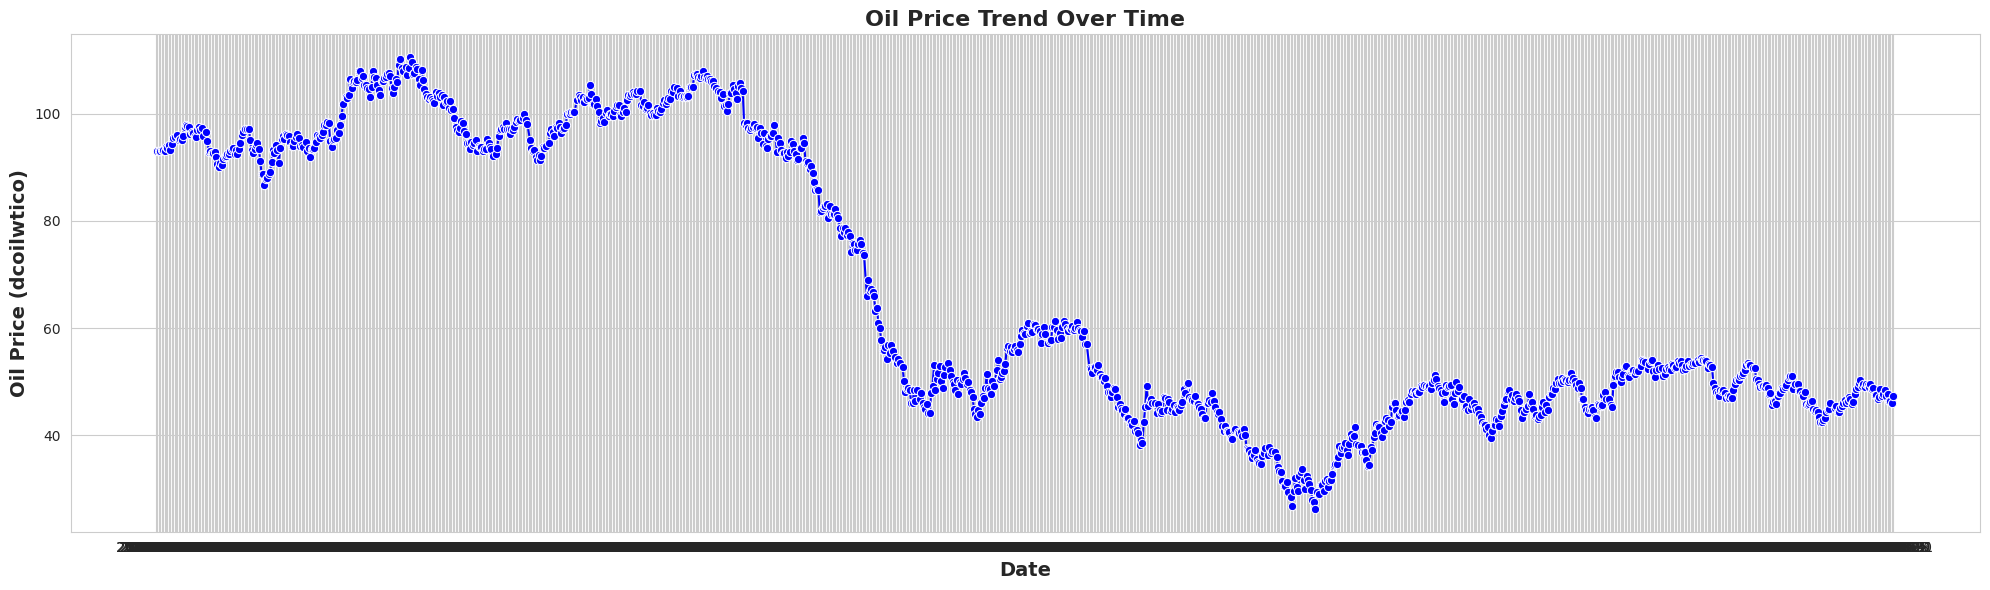

In [ ]:
# Plot oil price
# Set seaborn style to a modern style
import seaborn as sns
sns.set_style("whitegrid")

# Plot the graph using seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(data=oil, x='date', y='dcoilwtico', marker='o', color='blue')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Oil Price (dcoilwtico)', fontsize=14, fontweight='bold')
plt.title('Oil Price Trend Over Time', fontsize=16, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

## Holiday Dataset

In [ ]:
# Checking holiday dataset
holiday['date'] = pd.to_datetime(holiday['date'])
print(holiday.head())
skim(holiday)

# No missing values

        date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 350    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ transferred                        │              12 │                         0.034 │          ▇          │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2012-03-02      │     2017-12-26      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ type                      │       0 │          0 │                            1 │                      355 │  │
│ │ locale                    │       0 │          0 │                            1 │                      350 │  │
│ │ locale_name               │       0 │          0 │                          1.1 │                      392 │  │
│ │ description               │       0 │          0 │                          2.9 │                     1027 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Interpolation

In [ ]:
# using storesales_oil data
# 2013-01-01 to 2017-08-15

# 1. Impute all nulls with 0
# storesales_oil.fillna(0, inplace=True)

# 2. Convert date column to datetime type in %Y-%m-%d format
storesales_oil['date'] = pd.to_datetime(storesales_oil['date'], format='%Y-%m-%d')

# 3. Sort by store_nbr and date, then fill in missing dates and forward fill other columns
# Get the range of dates
min_date = storesales_oil['date'].min()
max_date = storesales_oil['date'].max()
all_dates = pd.date_range(start=min_date, end=max_date)

# Process each store separately
result = []
for store in storesales_oil['store_nbr'].unique():
    store_data = storesales_oil[storesales_oil['store_nbr'] == store].set_index('date')
    store_data = store_data.reindex(all_dates, method='ffill').fillna(0).reset_index()
    store_data['store_nbr'] = store
    result.append(store_data)

# Concatenate all the stores data
final_data = pd.concat(result)

# Rename columns appropriately
final_data.columns = ['date', 'store_nbr', 'dcoilwtico', 'sales']

# Reorder columns
final_data = final_data[['store_nbr', 'date', 'sales', 'dcoilwtico']]

print(final_data)

      store_nbr       date  sales    dcoilwtico
0          0.00 2013-01-01      1      0.000000
1         93.14 2013-01-02      1   7417.148000
2         92.97 2013-01-03      1   5873.244001
3         93.12 2013-01-04      1   5919.879001
4          0.00 2013-01-05      1   6318.785010
...         ...        ...    ...           ...
1683      48.81 2017-08-11     54   8513.834000
1684       0.00 2017-08-12     54   9139.678002
1685       0.00 2017-08-13     54  14246.827996
1686      47.59 2017-08-14     54  11882.994000
1687      47.57 2017-08-15     54  12666.858000

[91152 rows x 4 columns]


In [ ]:
# Plotting
stores = final_data['store_nbr'].unique()

fig, axes = plt.subplots(nrows=len(stores), ncols=1, figsize=(10, 5 * len(stores)), sharex=True)

if len(stores) == 1:
    axes = [axes]

for i, store in enumerate(stores):
    store_data = final_data[final_data['store_nbr'] == store]
    ax = axes[i]
    ax.plot(store_data['date'], store_data['sales'], label='Sales')
    ax.plot(store_data['date'], store_data['dcoilwtico'], label='Dcoilwtico', linestyle='--')
    ax.set_title(f'Store {store}')
    ax.legend()
    ax.set_ylabel('Value')
    ax.grid(True)

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()


#### Extra stuff for reference later

In [ ]:
from scipy import stats
# from scipy.stats import shapiro
# shapiro(store_1['sales'])
store_1 = store_sales[store_sales['store_nbr'] == 1]
store_1 = store_1.drop(columns=['store_nbr'])
# store_1
shapiro_test_statistic, shapiro_test_p_value = stats.shapiro(store_1['sales'])
print("Shapiro-Wilk test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_test_p_value)

Shapiro-Wilk test:
Test Statistic: 0.973595917224884
p-value: 4.803272050100676e-17


In [ ]:
results = []

# Iterate over each store
for store_id in range(1, 55):  # Assuming store IDs are from 1 to 2
    # Filter data for the current store
    store_data = store_sales[store_sales['store_nbr'] == store_id].copy()
    store_data.drop(columns=['store_nbr'], inplace=True)

    # Perform Shapiro-Wilk test for normality on the sales data of the current store
    shapiro_test_statistic, shapiro_test_p_value = stats.shapiro(store_data['sales'])

    # Determine if normally distributed (1) or not (0) based on p-value
    normally_distributed = 1 if shapiro_test_p_value > 0.05 else 0

    # Store the results in a dictionary
    result = {
        'store_id': store_id,
        'p_value': shapiro_test_p_value,
        'normally_distributed': normally_distributed
    }

    # Append the result to the list of results
    results.append(result)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)